Investigate River Tides in Nowcast v201702 versus Observations

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

from salishsea_tools import data_tools

%matplotlib inline

### Model Results

In [5]:
sshCove = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_base/SandyCove.nc').variables['sossheig'][:, 0, 0]
sshSand = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_base/SandHeads.nc').variables['sossheig'][:, 0, 0]
sshWood = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_base/WoodwardsLanding.nc').variables['sossheig'][:, 0, 0]
sshNewWest = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_base/NewWestminster.nc').variables['sossheig'][:, 0, 0]

sshCove_free = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_free/SandyCove.nc').variables['sossheig'][:, 0, 0]
sshSand_free = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_free/SandHeads.nc').variables['sossheig'][:, 0, 0]
sshWood_free = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_free/WoodwardsLanding.nc').variables['sossheig'][:, 0, 0]
sshNewWest_free = nc.Dataset('/data/sallen/results/MEOPAR/01dec17_free/NewWestminster.nc').variables['sossheig'][:, 0, 0]

In [6]:
mmCove = np.mean(sshCove)
mmSand = np.mean(sshSand)
mmWood = np.mean(sshWood)
mmNewWest = np.mean(sshNewWest)

mmCovef = np.mean(sshCove_free)
mmSandf = np.mean(sshSand_free)
mmWoodf = np.mean(sshWood_free)
mmNewWestf = np.mean(sshNewWest_free)

In [7]:
modeltime = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range('2017-12-01T00:05:00Z', '2017-12-01T23:55:00Z',
                                      freq='10T'))
#       .index.strftime('%Y-%m-%dT%H:%M:%SZ')
#       .tolist()
)

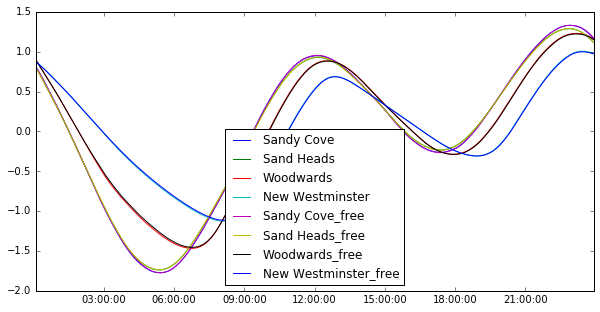

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(modeltime.index, sshCove - mmCove, label="Sandy Cove")
ax.plot(modeltime.index, sshSand - mmSand, label="Sand Heads")
ax.plot(modeltime.index, sshWood - mmWood, label="Woodwards")
ax.plot(modeltime.index, sshNewWest - mmNewWest, label="New Westminster")
ax.plot(modeltime.index, sshCove_free - mmCovef, label="Sandy Cove_free")
ax.plot(modeltime.index, sshSand_free - mmSandf, label="Sand Heads_free")
ax.plot(modeltime.index, sshWood_free - mmWoodf, label="Woodwards_free")
ax.plot(modeltime.index, sshNewWest_free - mmNewWestf, label="New Westminster_free")
ax.legend(loc='best')

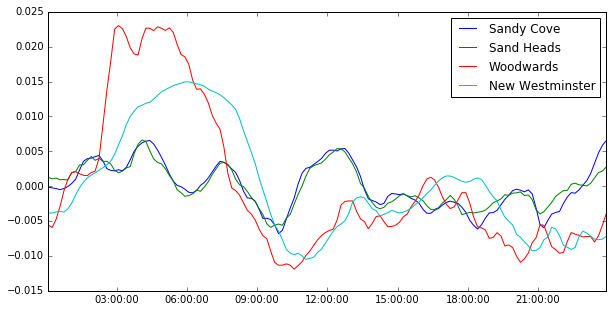

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(modeltime.index, sshCove_free - mmCovef - (sshCove - mmCove), label="Sandy Cove")
ax.plot(modeltime.index, sshSand_free - mmSandf - (sshSand - mmSand), label="Sand Heads")
ax.plot(modeltime.index, sshWood_free - mmWoodf - (sshWood - mmWood), label="Woodwards")
ax.plot(modeltime.index, sshNewWest_free - mmNewWestf - (sshNewWest - mmNewWest), label="New Westminster")
ax.legend(loc='best')

### Observations

In [10]:
obsCove = data_tools.get_chs_tides('obs', 'Sandy Cove', '2017-12-01', '2017-12-02')
obsSand = data_tools.get_chs_tides('obs', 'Sand Heads', '2017-12-01', '2017-12-02')
obsWood = data_tools.get_chs_tides('obs', 'Woodwards Landing', '2017-12-01', '2017-12-02')
obsNewWest = data_tools.get_chs_tides('obs', 'New Westminister', '2017-12-01', '2017-12-02')

In [11]:
moCove = np.mean(obsCove)
moSand = np.mean(obsSand)
moWood = np.mean(obsWood)
moNewWest = np.mean(obsNewWest)

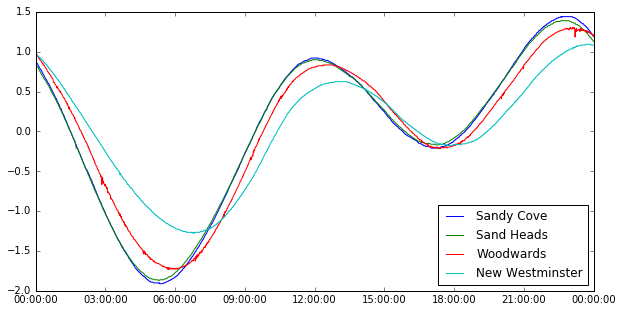

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(obsCove - moCove, label="Sandy Cove")
ax.plot(obsSand - moSand, label="Sand Heads")
ax.plot(obsWood - moWood, label="Woodwards")
ax.plot(obsNewWest - moNewWest, label="New Westminster")
ax.legend(loc='best')

### Comparison

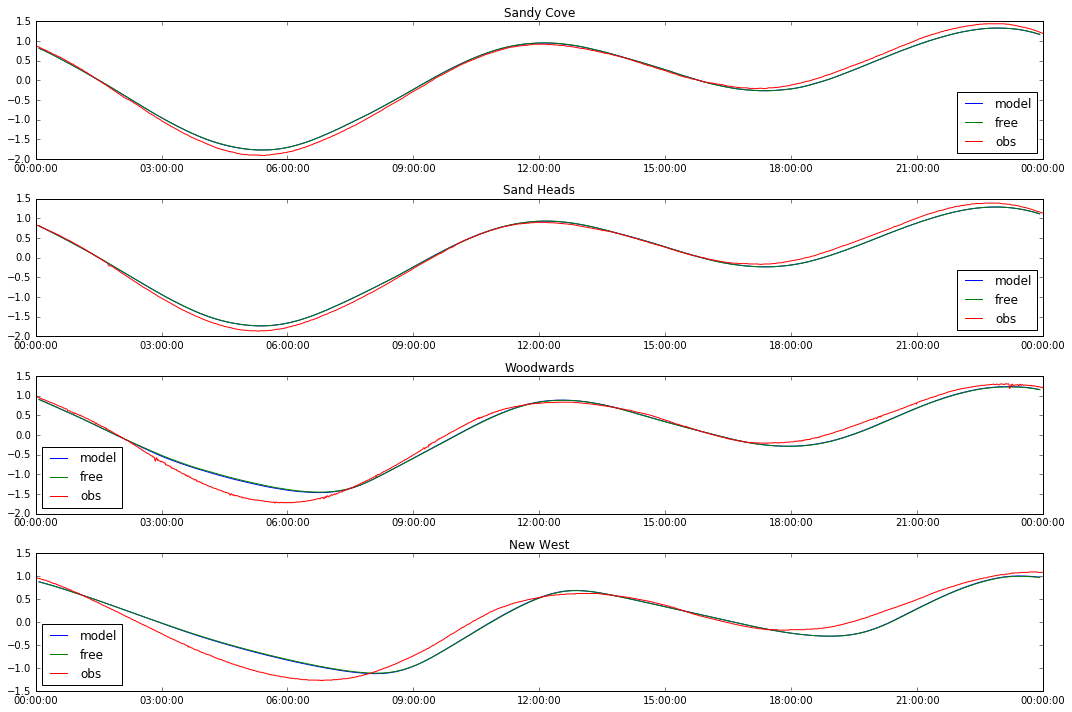

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))
axs[0].plot(modeltime.index, sshCove - mmCove, label="model")
axs[1].plot(modeltime.index, sshSand - mmSand, label="model")
axs[2].plot(modeltime.index, sshWood - mmWood, label="model")
axs[3].plot(modeltime.index, sshNewWest - mmNewWest, label="model")
axs[0].plot(modeltime.index, sshCove_free - mmCovef, label="free")
axs[1].plot(modeltime.index, sshSand_free - mmSandf, label="free")
axs[2].plot(modeltime.index, sshWood_free - mmWoodf, label="free")
axs[3].plot(modeltime.index, sshNewWest_free - mmNewWestf, label="free")
axs[0].plot(obsCove - moCove, label="obs")
axs[1].plot(obsSand - moSand, label="obs")
axs[2].plot(obsWood - moWood, label="obs")
axs[3].plot(obsNewWest - moNewWest, label="obs")
axs[0].set_title('Sandy Cove')
axs[1].set_title('Sand Heads')
axs[2].set_title('Woodwards')
axs[0].legend(loc='best')
axs[1].legend(loc='best')
axs[2].legend(loc='best')
axs[3].legend(loc='best')
axs[3].set_title('New West')
fig.tight_layout()

Free slip makes no difference!